### Practice Exercises(Polynomial Regression)

In [2]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()
sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, EXPERIENCE_PRODUCTIVITY

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
#loading the dataset
df = pd.read_csv(EXPERIENCE_PRODUCTIVITY)
print(f'shape of the dataset: {df.shape}\n')
print(f'missing values:\n {df.isnull().sum()}')

#feature and target variable
X = df[['Experience']].values
y = df[['Productivity']].values
# print(f'{X},{y}')

shape of the dataset: (15, 2)

missing values:
 Experience      0
Productivity    0
dtype: int64


In [9]:
#splitting training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

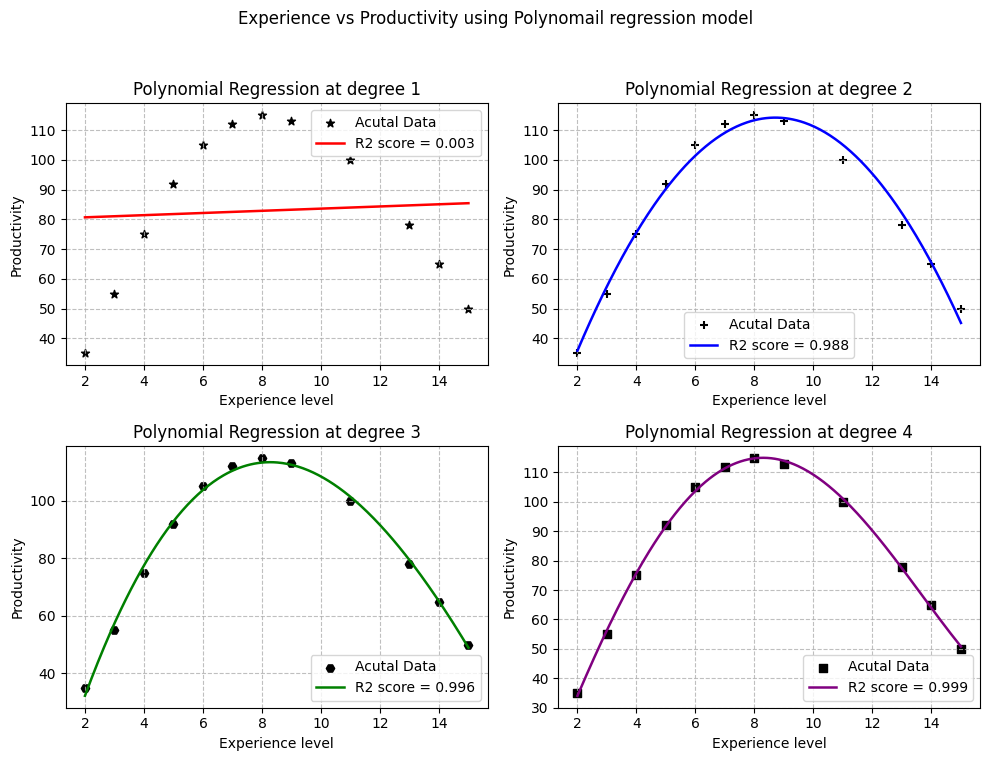

R2 score for this model at degree 4 is 0.9988 and Interception of this reg model is Perfect Model


In [21]:
#visualization of regression model at different degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
degrees = [1,2,3,4]
colors=['red','blue','green','purple']
markers =['*','+','H',',']

plt.figure(figsize=(10,7))

results = []

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i+1)

    #fit the model

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    ln_poly = LinearRegression()
    ln_poly.fit(X_train_poly,y_train)

    R2 = r2_score(y_train,ln_poly.predict(X_train_poly))


    #for smooth visualization

    X_smooth = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)

    X_smooth_poly = poly.transform(X_smooth)

    y_smooth_pred = ln_poly.predict(X_smooth_poly)

    plt.scatter(X_train,y_train,color='black',marker=markers[i],label='Acutal Data')
    plt.plot(X_smooth, y_smooth_pred,color=colors[i],linewidth=1.8,label=f'R2 score = {R2:.3f}')
    plt.title(f'Polynomial Regression at degree {degree}')
    plt.ylabel('Productivity')
    plt.xlabel('Experience level')
    plt.grid(True,alpha=0.8,linestyle='--')
    plt.legend()

    results.append({
        'Degree' : degree,
        'R2_score' : R2
    })
plt.tight_layout()
plt.suptitle('Experience vs Productivity using Polynomail regression model',fontweight=450,y=1.08)
plt.show()

for res in results:
    if res['R2_score'] >= 0.9:
        interpretation  = 'Perfect Model'

    elif res['R2_score'] >= 0.8:
        interpretation  = 'Okish model'

    else:
        interpretation  = 'Model Needs improvement'

print(f'R2 score for this model at degree {res['Degree']} is {res['R2_score']:.4f} and Interception of this reg model is {interpretation }')

In [31]:
#applying regression model on test set to see how good our model works.

degree = 4
poly = PolynomialFeatures(degree=degree)
X_poly_test = poly.fit_transform(X_test)

y_pred_test =ln_poly.predict(X_poly_test)

df_comparsion = pd.DataFrame({
    'Actual Value':y_test.ravel(),
    'Predicted Value':y_pred_test.ravel(),
    'Error': y_test.ravel() - y_pred_test.ravel()
})

print(f'Comparsion between Actual value and predicted Value by regression model at degree 4:')
df_comparsion

Comparsion between Actual value and predicted Value by regression model at degree 4:


,Actual Value,Predicted Value,Error
0,108,109.222564,-1.222564
1,90,90.174293,-0.174293
2,20,9.695516,10.304484
